In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import glob
import re
import random
import torch
from scipy.stats import entropy

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy/')
import npspy as nps
from npspy import npsc

In [2]:
hp1_1_entropy_df = []
for it in range(0,11):
    if it == 0:
        clean_obj = nps.io.read_pickle(f'../../../00.data/hp1_1_valid80.pkl')
    else:
        clean_obj = nps.io.read_pickle(f'../../../03.results/iteration_num/hp1_1_iter{it}/hp1_1_valid80_iter{it}_clean_obj.pkl')
    clean_dm = nps.dn.get_density_matrix_from_an_obj(clean_obj)
    hp1_1_entropy_df.append([f'iteration{it}', entropy(clean_dm).mean()])

In [3]:
hp1_1_entropy_df = pd.DataFrame(hp1_1_entropy_df, columns=['iteration', 'entropy'])

In [4]:
hp1_1_entropy_df['peptide'] = 'hp1_1'

([<matplotlib.axis.YTick at 0x772339b3f770>,
 [Text(0, 5.5, '5.5'),
  Text(0, 5.6, '5.6'),
  Text(0, 5.7, '5.7'),
  Text(0, 5.8, '5.8')])

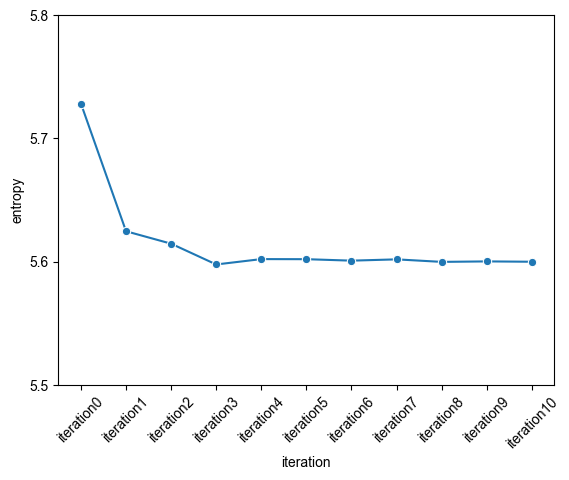

In [5]:
sns.lineplot(data=hp1_1_entropy_df, x='iteration', y='entropy', marker="o")
plt.ylim(5.5,5.8)
plt.xticks(rotation=45)
plt.yticks([5.5, 5.6, 5.7, 5.8], [5.5, 5.6, 5.7, 5.8])

In [21]:
hp1_2_entropy_df = []
for it in range(0,11):
    if it == 0:
        clean_obj = nps.io.read_pickle(f'../../../00.data/hp1_2_valid80.pkl')
    else:
        clean_obj = nps.io.read_pickle(f'../../../03.results/iteration_num/hp1_2_iter{it}/hp1_2_valid80_iter{it}_clean_obj.pkl')
    clean_dm = nps.dn.get_density_matrix_from_an_obj(clean_obj)
    hp1_2_entropy_df.append([f'iteration{it}', entropy(clean_dm).mean()])
hp1_2_entropy_df = pd.DataFrame(hp1_2_entropy_df, columns=['iteration', 'entropy'])
hp1_2_entropy_df['peptide'] = 'hp1_2'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'iteration0'),
  Text(1, 0, 'iteration1'),
  Text(2, 0, 'iteration2'),
  Text(3, 0, 'iteration3'),
  Text(4, 0, 'iteration4'),
  Text(5, 0, 'iteration5'),
  Text(6, 0, 'iteration6'),
  Text(7, 0, 'iteration7'),
  Text(8, 0, 'iteration8'),
  Text(9, 0, 'iteration9'),
  Text(10, 0, 'iteration10')])

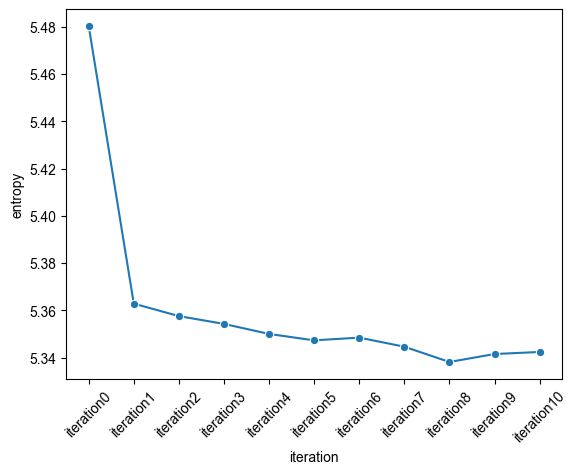

In [22]:
sns.lineplot(data=hp1_2_entropy_df, x='iteration', y='entropy', marker="o")
plt.xticks(rotation=45)
# plt.ylim(5.5,5.7)
# plt.yticks([5.5, 5.6, 5.7], [5.5, 5.6, 5.7])

In [23]:
entropy_df = pd.concat([hp1_1_entropy_df, hp1_2_entropy_df])

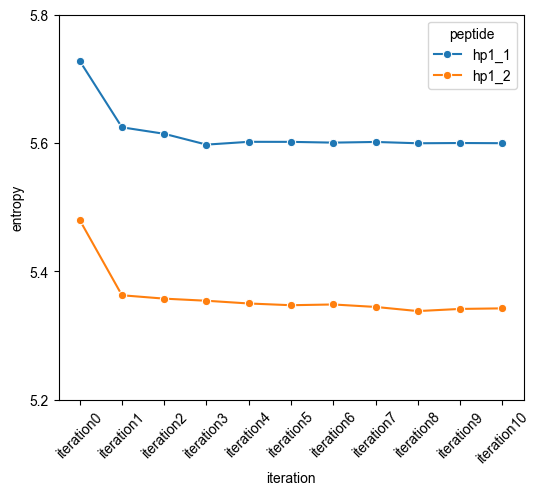

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(data=entropy_df, x='iteration', y='entropy', marker="o", hue='peptide')
plt.xticks(rotation=45)
plt.ylim(5.2, 5.8)
plt.yticks([5.2, 5.4, 5.6, 5.8], [5.2, 5.4, 5.6, 5.8])
plt.savefig('../../../05.figures/iteration_num/entropy_dis.pdf', bbox_inches='tight')

In [25]:
entropy_df

,iteration,entropy,peptide
0,iteration0,5.728209,hp1_1
1,iteration1,5.624608,hp1_1
2,iteration2,5.614519,hp1_1
3,iteration3,5.597648,hp1_1
4,iteration4,5.602004,hp1_1
5,iteration5,5.601937,hp1_1
6,iteration6,5.600743,hp1_1
7,iteration7,5.601797,hp1_1
8,iteration8,5.599747,hp1_1
9,iteration9,5.600136,hp1_1
